# Lab 3
### Averaging Filters

http://scikit-image.org/docs/0.13.x/api/skimage.util.html#skimage.util.random_noise

http://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.median

http://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.gaussian

In [37]:
from commonfunctions import *
import math
from skimage.filters import median, gaussian
from skimage.util import random_noise
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
'''
(1) Your own median filter algorithm
'''
def median_filter_custom(image, window_size=3):
    output_image = np.zeros(image.shape)
    edge_x = window_size // 2
    edge_y = window_size // 2

    for i in range(edge_x, image.shape[0] - edge_x):
        for j in range(edge_y, image.shape[1] - edge_y):
            window = image[i-edge_x:i+edge_x+1, j-edge_y:j+edge_y+1]
            output_image[i, j] = np.median(window)
    
    return output_image



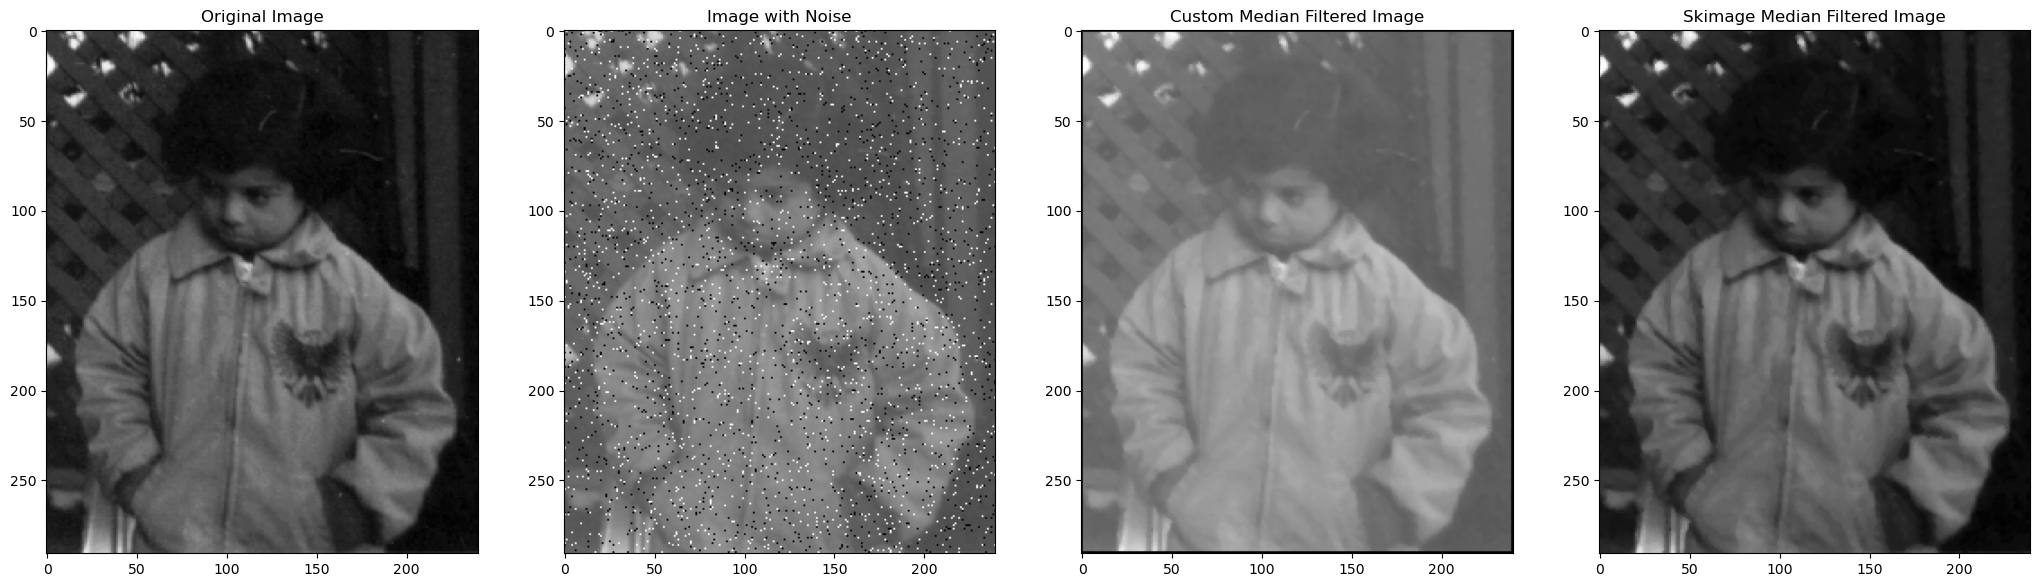

In [39]:
'''
(2) skimage median filter
'''

image = io.imread('pout.tif')
image_salt_papper_noise = random_noise(image, mode='s&p', amount=0.05)

median_filtered_custom_image = median_filter_custom(image_salt_papper_noise)
median_filtered_skimage_image = median(image_salt_papper_noise)

show_images([image, image_salt_papper_noise, median_filtered_custom_image, median_filtered_skimage_image], ['Original Image', 'Image with Noise', 'Custom Median Filtered Image', 'Skimage Median Filtered Image'])


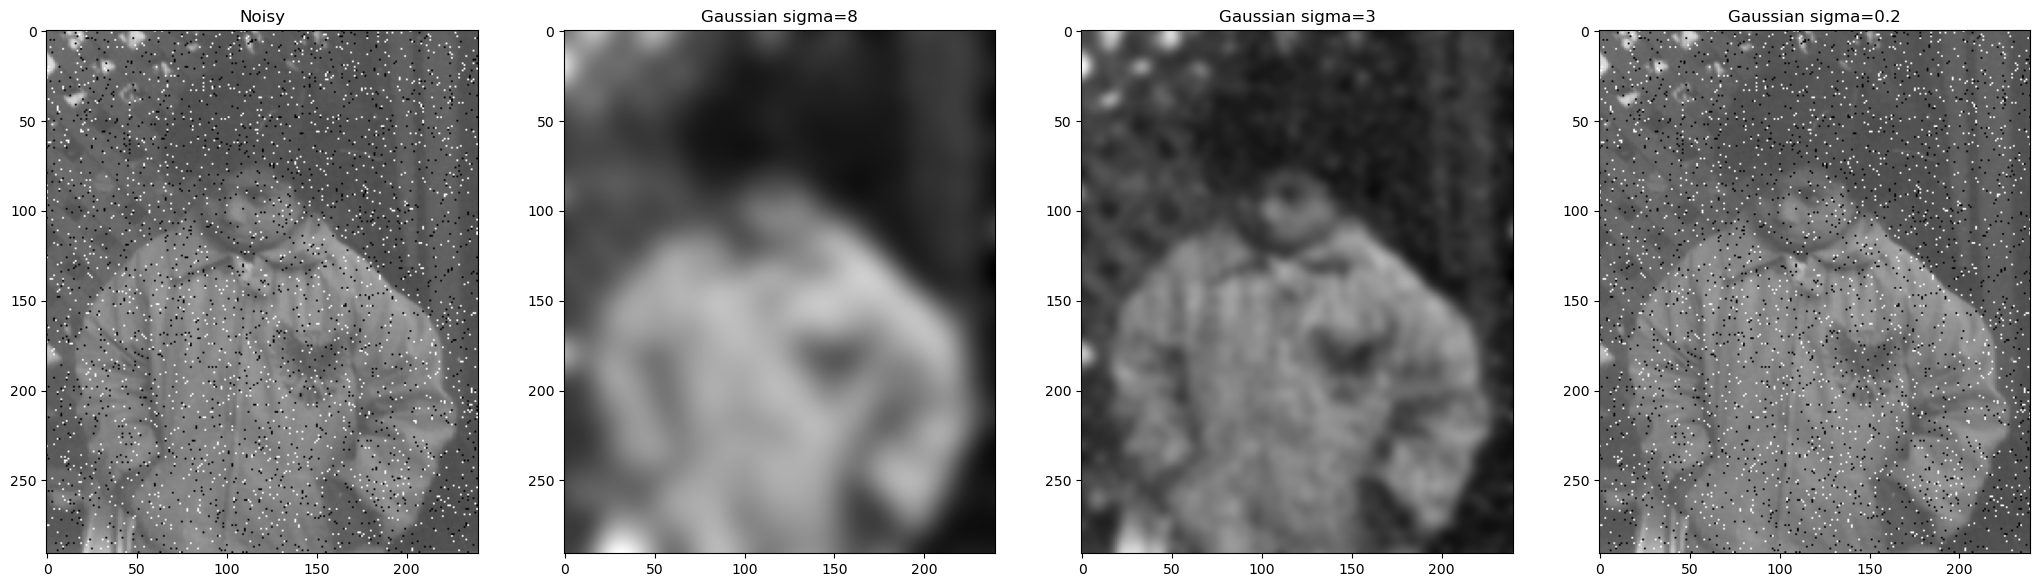

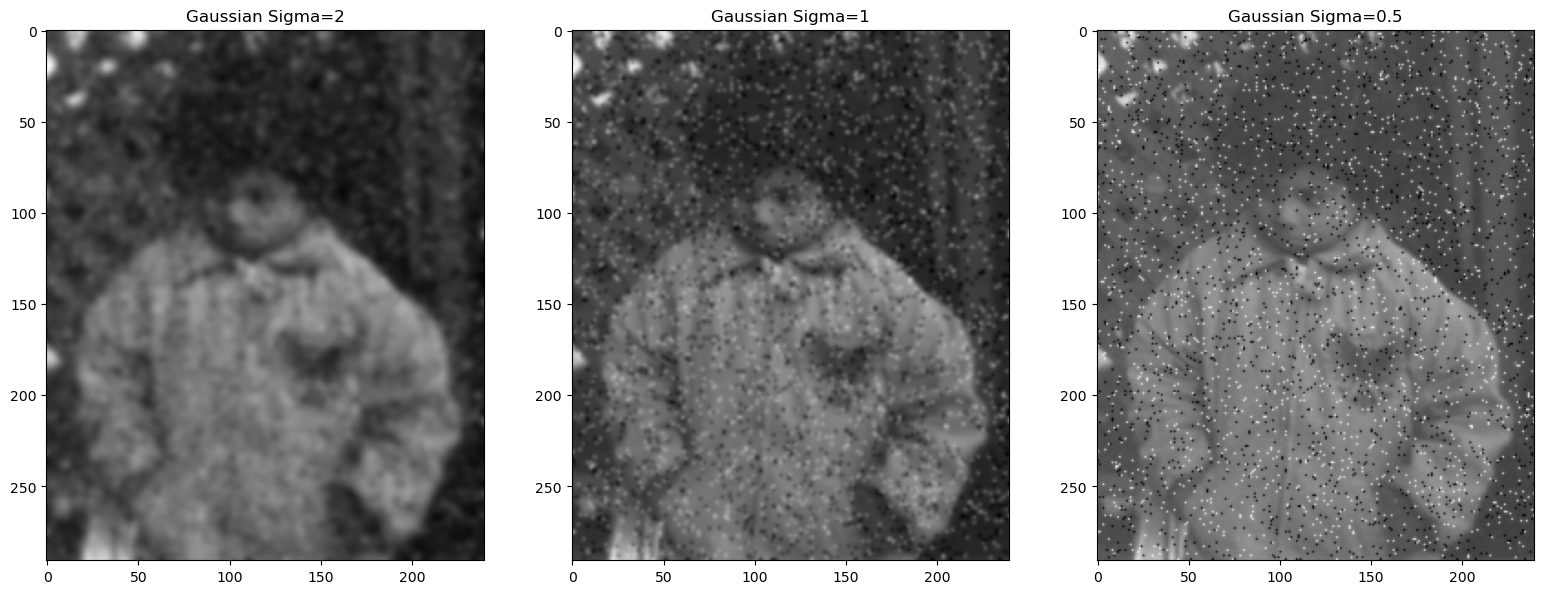

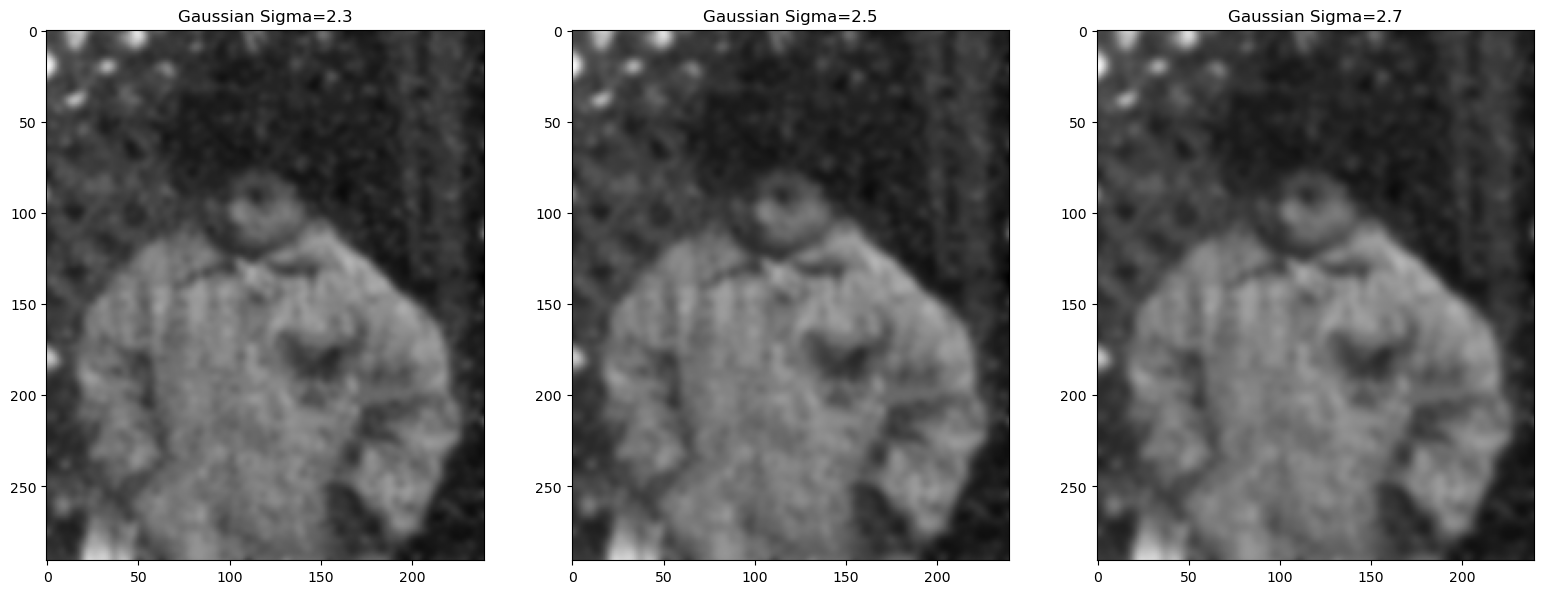

In [34]:
'''
(3) Gaussion Filters
'''
gaussian_8 = gaussian(image_salt_papper_noise, sigma=8)
gaussian_3 = gaussian(image_salt_papper_noise, sigma=3)
gaussian_02 = gaussian(image_salt_papper_noise, sigma=0.2)
show_images([image_salt_papper_noise, gaussian_8, gaussian_3, gaussian_02],
            ['Noisy', 'Gaussian sigma=8', 'Gaussian sigma=3', 'Gaussian sigma=0.2'])

gaussian_2 =  gaussian(image_salt_papper_noise, sigma=2)
gaussian_1 =  gaussian(image_salt_papper_noise, sigma=1)
gaussian_05 =  gaussian(image_salt_papper_noise, sigma=0.5)

show_images([gaussian_2, gaussian_1, gaussian_05], ['Gaussian Sigma=2', 'Gaussian Sigma=1', 'Gaussian Sigma=0.5'])

gaussian_23 =  gaussian(image_salt_papper_noise, sigma=2.3)
gaussian_25 =  gaussian(image_salt_papper_noise, sigma=2.5)
gaussian_27 =  gaussian(image_salt_papper_noise, sigma=2.7)

show_images([gaussian_23, gaussian_25, gaussian_27], ['Gaussian Sigma=2.3', 'Gaussian Sigma=2.5', 'Gaussian Sigma=2.7'])
#At sigma = 2.5, the noise was reduced effectively without blurring important image details.
#In contrast, a large sigma value (8) caused excessive blurring and loss of details,
#while a small sigma value (0.2) did not remove the noise sufficiently
